In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.metrics import pairwise_distances

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df =  pd.read_csv('raw_data.csv')
df.columns =["start", "total", 'overhead', 'duration']
print(df.describe())
df['c'] = df['total'].diff()
df_filtered = df[df['c'] != 0]

index_list = df_filtered.index.tolist() # list of the start poisitions of index for change of values 
# print(len(index_list))
# print('\n')
# print(index_list)

l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

# len(list_of_dfs)


               start          total       overhead       duration
count  194684.000000  194684.000000  194684.000000  194684.000000
mean      486.394290     498.049660       1.971974     809.655986
std       150.842743     162.427938       1.464050   15460.912356
min       194.000000     200.000000       0.752642       2.000000
25%       396.000000     400.000000       1.366191     173.000000
50%       496.000000     500.000000       1.731875     296.000000
75%       595.000000     600.000000       2.190530     449.000000
max       854.000000     900.000000      30.000000  620586.000000


In [4]:
data = pd.DataFrame(columns=['median', 'q1', 'q3', 'p90', 'cars'])
mode = []
median, q1, q3, p90 = [], [], [], []

In [5]:
for frame in list_of_dfs:
    m = frame['overhead'].median()
    median.append(m)
    q1.append(frame['overhead'].quantile(q =.25))
    q3.append(frame['overhead'].quantile(q =.75))
    p90.append(frame['overhead'].quantile(q =.9))
    mode.append(frame['total'].mode()[0]) # mode returns a series so we need to specify which value to return


In [6]:
data['median'] = median
data['q1'] = q1
data['q3'] = q3
data['p90']= p90
data['cars'] = mode

data

,median,q1,q3,p90,cars
0,1.582044,1.306363,1.881764,2.231246,200
1,1.607571,1.316283,1.950820,2.324354,300
2,1.557614,1.283480,1.874575,2.143453,200
3,1.625797,1.331584,1.969039,2.369109,300
4,1.709305,1.351439,2.085545,2.486877,400
...,...,...,...,...,...
150,1.775290,1.389824,2.346458,3.081876,600
151,1.750722,1.392663,2.160634,2.717248,500
152,1.850352,1.412053,2.380013,3.182939,600
153,1.880450,1.365687,2.530237,3.445871,700


In [7]:
data.drop([154, 153, 152, 151, 150], inplace = True)  # to be able to split the data eaqualy 

In [8]:
data_split = data[['median', 'q1', 'q3', 'p90', 'cars']].to_numpy()
data_split = np.split(data_split, 10)

In [9]:
def print_graphs(data_split_z, title):
    figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
    axs[0,0].scatter(data_split_z[:,4], data_split_z[:,0], cmap='rainbow', alpha=0.7, edgecolors='b')  
    axs[0,0].set_ylabel('Overhead: median')
    axs[0,0].set_xlabel('Car number')

    axs[0,1].scatter(data_split_z[:,4], data_split_z[:,1], cmap='rainbow', alpha=0.7, edgecolors='b')    
    axs[0,1].set_ylabel('Overhead: Q1')
    axs[0,1].set_xlabel('Car number')

    axs[1,0].scatter(data_split_z[:,4], data_split_z[:,2], cmap='rainbow', alpha=0.7, edgecolors='b')    
    axs[1,0].set_ylabel('Overhead: Q3')
    axs[1,0].set_xlabel('Car number')

    axs[1,1].scatter(data_split_z[:,4], data_split_z[:,3], cmap='rainbow', alpha=0.7, edgecolors='b')
    axs[1,1].set_ylabel('Overhead: 90th Percentile')
    axs[1,1].set_xlabel('Car number')

    figure.tight_layout(rect=[0, 0.03, 1, 0.95])
    figure.suptitle(title, fontsize=36)

# Z- Score

In [10]:
data_split_z = data[['median', 'q1', 'q3', 'p90', 'cars']].to_numpy()
# print_graphs(data_split_z, 'Before outlier detection')
data_split_z = np.split(data_split_z, 10)
indexes = [] 
for d in range(len(data_split_z)):
    ind = []
    k = len(data_split_z[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_z[d][:,i] 
        mean_ys = np.mean(ys)
        std_ys = np.std(ys)
        
        for y in range(len(data_split_z[d])):
            z_score = (data_split_z[d][y, i]  - mean_ys) / std_ys
            if np.abs(z_score) > 3:
                ind.append(y)
    data_split_z[d] = np.delete(data_split_z[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_z[d]))))
    print('\n')
    for num in range(len(ind)):
        j = ind[num] + (d*15)
        ind[num] = j
        
    indexes.append(ind)

print(indexes)
data_split_z = np.concatenate(data_split_z, axis=0)
# print_graphs(data_split_z, 'After outlier detection')

Outliers detected: 0


Outliers detected: 0


Outliers detected: 0


Outliers detected: 0


Outliers detected: 0


Outliers detected: 0


Outliers detected: 0


Outliers detected: 0


Outliers detected: 0


Outliers detected: 1


[[], [], [], [], [], [], [], [], [], [145, 145, 145, 145]]


In [11]:
ided_o = [145, 146]
o = 145
not_ided_o = 146

In [14]:
data_split_z_original = data[['median', 'q1', 'q3', 'p90', 'cars']].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,5))


ax1.scatter(data_split_z_original[:,0], data_split_z_original[:,1], cmap='rainbow', alpha=0.7, edgecolors='b')
ax1.scatter(data_split_z_original[ided_o,0], data_split_z_original[ided_o,1], c='r', alpha=1, edgecolors='r', marker = "o")
ax1.set_ylabel('Overhead: 1st Quartile')
ax1.set_xlabel('Overhead: Median')

ax2.scatter(data_split_z[:,0], data_split_z[:,1], cmap='rainbow', alpha=0.7, edgecolors='b')
ax2.scatter(data_split_z_original[o,0], data_split_z_original[o,1], c='g', alpha=1, edgecolors='g', marker = "s")
ax2.scatter(data_split_z_original[not_ided_o,0], data_split_z_original[not_ided_o,1], c='red', alpha=1, edgecolors='r')
ax2.set_ylabel('Overhead: 1st Quartile')
ax2.set_xlabel('Overhead: Median')
plt.savefig(fig, )
plt.close(fig)


# modified z-score

In [9]:
data_split_modified_z = data[['median', 'q1', 'q3', 'p90', 'cars']].to_numpy()
indexes = [] 
# print_graphs(data_split_modified_z, 'Before outlier detection')
data_split_modified_z = np.split(data_split_modified_z, 10)

for d in range(len(data_split_modified_z)):
    ind = []
    k = len(data_split_modified_z[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_modified_z[d][:,i] 
        median_y = np.median(ys)
        median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
#         print(median_absolute_deviation_y)
        for y in range(len(data_split_modified_z[d])):
            modified_z_score = 0.6745 * (data_split_modified_z[d][y, i] - median_y) / median_absolute_deviation_y
#             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
            if np.abs(modified_z_score) > 3.5:
                ind.append(y)


    data_split_modified_z[d] = np.delete(data_split_modified_z[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_modified_z[d]))))
    for num in range(len(ind)):
        j = ind[num] + (d*15)
        ind[num] = j
        
    indexes.append(ind)
#     print('\n')
print(indexes)
data_split_modified_z = np.concatenate(data_split_modified_z, axis=0)
# print_graphs(data_split_modified_z, 'After outlier detection')

Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 0
Outliers detected: 2
[[], [], [], [59, 59], [], [], [], [109], [], [145, 145, 146, 145, 145, 146]]


In [10]:
ided_o = [145, 146]
o = [59, 109, 145, 146]
additional = [59, 109]

Text(0.5, 0, 'Overhead: Median')

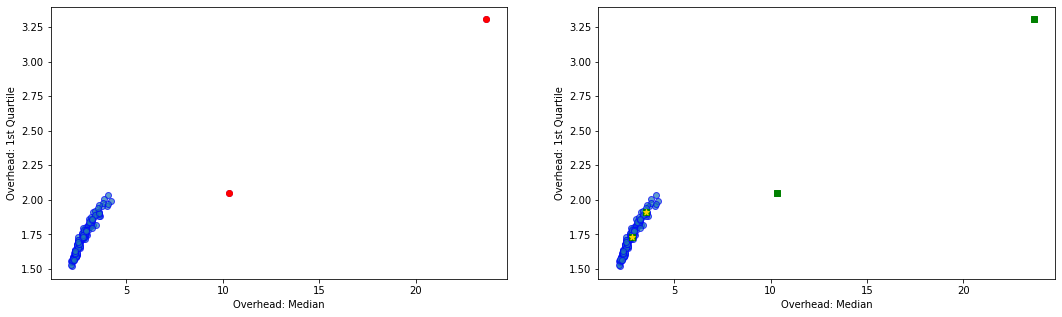

In [11]:
data_split_z_original = data[['median', 'q1', 'q3', 'p90', 'cars']].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,5))

ax1.scatter(data_split_z_original[:,3], data_split_z_original[:,0], cmap='rainbow', alpha=0.7, edgecolors='b')
ax1.scatter(data_split_z_original[ided_o,3], data_split_z_original[ided_o,0], c='red', alpha=1, edgecolors='r')
# ax1
# ax1.grid()
ax1.set_ylabel('Overhead: 1st Quartile')
ax1.set_xlabel('Overhead: Median')

ax2.scatter(data_split_modified_z[:,3], data_split_modified_z[:,0], cmap='rainbow', alpha=0.7, edgecolors='b')
ax2.scatter(data_split_z_original[o,3], data_split_z_original[o,0], c='g', alpha=1, edgecolors='g', marker = "s")
ax2.scatter(data_split_z_original[additional,3], data_split_z_original[additional,0], c='gold', alpha=1, edgecolors='gold', marker = '*')
# ax2.grid()
ax2.set_ylabel('Overhead: 1st Quartile')
ax2.set_xlabel('Overhead: Median')



# PCA AFTER OUTLIER DFTECTION

In [121]:
new_data = pd.DataFrame(columns=['avg', 'median', 'std', 'var', 'q1', 'q3', 'p90'])

In [122]:

median, q1, q3, p90 = [], [], [], []
avg, var, std = [], [], []

for frame in list_of_dfs:
    m = frame['overhead'].median()
    median.append(m)
    q1.append(frame['overhead'].quantile(q =.25))
    q3.append(frame['overhead'].quantile(q =.75))
    p90.append(frame['overhead'].quantile(q =.9))
#     mode.append(frame['total'].mode()[0]) # mode returns a series so we need to specify which value to return
    avg.append(frame['overhead'].mean())
    std.append(frame['overhead'].std())
    var.append(frame['overhead'].var())
    

    
new_data['median'] = median
new_data['q1'] = q1
new_data['q3'] = q3
new_data['p90']= p90
new_data['avg'] = avg
new_data['var'] = var
new_data['std'] = std


new_data.drop([154, 153, 152, 151, 150], inplace = True)

new_data# to be able to split the data eaqualy 

,avg,median,std,var,q1,q3,p90
0,1.654107,1.582044,0.458358,0.210092,1.306363,1.881764,2.231246
1,1.692571,1.607571,0.522686,0.273200,1.316283,1.950820,2.324354
2,1.629607,1.557614,0.469557,0.220484,1.283480,1.874575,2.143453
3,1.715201,1.625797,0.546178,0.298310,1.331584,1.969039,2.369109
4,1.791137,1.709305,0.587387,0.345024,1.351439,2.085545,2.486877
...,...,...,...,...,...,...,...
145,8.173832,3.306561,9.221062,85.027977,2.076400,11.482347,23.676601
146,4.499359,2.046423,6.322819,39.978044,1.794835,3.250736,10.306895
147,2.536598,1.968424,2.729470,7.450005,1.521736,2.494555,4.044207
148,1.965303,1.772925,0.869409,0.755872,1.392493,2.267156,2.916118


In [124]:
new_data = new_data.to_numpy()

In [125]:
o = [59, 109, 145, 146]
new_data = np.delete(new_data, o, axis=0)

In [19]:
from copy import deepcopy 
new_data = deepcopy(data_split_modified_z)

In [20]:
new_data = new_data[:,0:-1]

In [36]:

scaler = StandardScaler()
scaler.fit(new_data)

X=scaler.transform(new_data)    

pca = PCA()
x_new = pca.fit_transform(new_data)

print('The variance in the features is best explained by which principal component: \n')
print(pca.explained_variance_ratio_)
print('\n\n')
print('The importnace of each feature on the components: \n')
print(abs( pca.components_ ))

The variance in the features is best explained by which principal component: 

[9.90726117e-01 7.15030531e-03 1.62441726e-03 4.99160166e-04]



The importnace of each feature on the components: 

[[0.21872415 0.08280164 0.41947066 0.87712485]
 [0.489671   0.10052078 0.72274623 0.47723764]
 [0.52587115 0.72330194 0.44730695 0.01450287]
 [0.660183   0.67813993 0.31874558 0.05182563]]


In [37]:
feat_1 = [0.21872415, 0.08280164, 0.41947066, 0.87712485]
feat_2 = [0.489671,   0.10052078, 0.72274623, 0.47723764]

In [38]:
bars = ['Median', '1st Quartile', '3rd Quartile', '90th Percentile']
y_pos = np.arange(len(bars))

Text(0.5, 1.0, 'Second Principal Component')

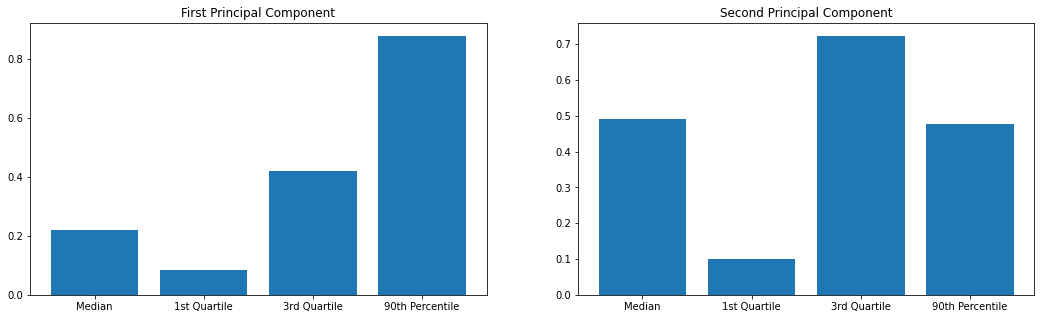

In [39]:
# Create bars
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,5))
ax1.set_xticks([0, 1, 2, 3]) 
ax1.bar(y_pos, feat_1)
ax1.set_xticklabels(bars)
ax1.set_title('First Principal Component')

ax2.set_xticks([0, 1, 2, 3]) 
ax2.bar(y_pos, feat_2)
ax2.set_xticklabels(bars)
ax2.set_title('Second Principal Component')
 
# Show graphic

In [40]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(new_data)
principalComponents


array([[-6.03103376e-01,  3.29893840e-02],
       [-4.86064155e-01,  1.40164407e-02],
       [-6.90361937e-01,  1.05499345e-02],
       [-4.33912711e-01,  1.17452204e-02],
       [-2.61835311e-01, -5.91430749e-02],
       [ 1.04535533e-02, -3.97289945e-02],
       [-1.92349543e-01, -3.60088010e-02],
       [-4.58419152e-01,  1.42886012e-02],
       [-1.20537745e-01, -1.60767398e-02],
       [-4.66867443e-01,  2.19031403e-02],
       [-6.23312076e-01,  2.60653744e-02],
       [-4.45820455e-01,  6.45812622e-02],
       [-6.99871162e-01,  6.94681463e-02],
       [-3.91007233e-01,  5.12910640e-03],
       [-3.45906143e-01, -2.28277473e-02],
       [ 2.07599636e-01, -5.45151969e-02],
       [-2.29866226e-01, -4.35709635e-02],
       [-4.55265089e-01,  3.67600868e-02],
       [-1.81318319e-01, -4.68866191e-02],
       [-5.18189694e-01,  1.75726164e-02],
       [-3.13533888e-01, -7.95234345e-03],
       [ 9.62317953e-02, -6.73974705e-02],
       [-1.96962098e-01, -2.97288083e-02],
       [ 2.

Text(0.5, 0, 'Car number')

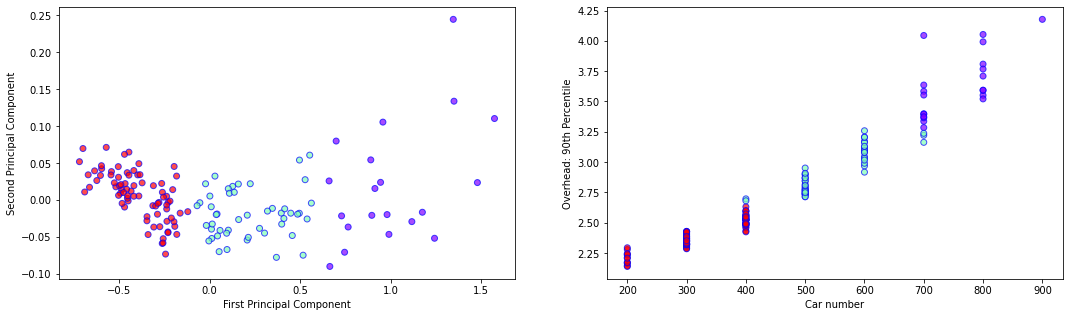

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,5))
ax1.scatter(principalComponents[:, 0], principalComponents[:, 1], c = labels_modified_z, cmap='rainbow', alpha=0.7, edgecolors='b')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

ax2.scatter(data_split_modified_z[:,4], data_split_modified_z[:,3],c=labels_modified_z, cmap='rainbow', alpha=0.7, edgecolors='b')
ax2.set_ylabel('Overhead: 90th Percentile')
ax2.set_xlabel('Car number')

# IQR method

In [93]:
data_split_irq = data[['median', 'q1', 'q3', 'p90', 'cars']].to_numpy()
# print_graphs(data_split_irq, 'Before outlier detection')
data_split_irq = np.split(data_split_irq, 10)
indexes = [] 

for d in range(len(data_split_irq)):
    ind = []
    k = len(data_split_irq[d])
    for i in [0, 1, 2, 3]:
        ys = data_split_irq[d][:,i]
        quartile_1, quartile_3 = np.percentile(ys, [25, 75])
        iqr = quartile_3 - quartile_1
        lower_bound = quartile_1 - (iqr * 1.5)
        upper_bound = quartile_3 + (iqr * 1.5)
        for y in range(len(data_split_irq[d])):
            if data_split_irq[d][y, i] > upper_bound or data_split_irq[d][y, i] < lower_bound:
#             modified_z_score = 0.6745 * (data_split[d][y, i] - median_y) / median_absolute_deviation_y
# #             z_score = (data_split[d][y, i]  - mean_ys) / std_ys
#             if np.abs(modified_z_score) > 3.5:
                ind.append(y)

    data_split_irq[d] = np.delete(data_split_irq[d], ind, axis=0)
    print('Outliers detected: ' + str((k - len(data_split_irq[d]))))
    for num in range(len(ind)):
        j = ind[num] + (d*15)
        ind[num] = j
    indexes.append(ind)
    
print(indexes)
data_split_irq = np.concatenate(data_split_irq, axis=0)
# print_graphs(data_split_irq, 'After outlier detection')

Outliers detected: 1
Outliers detected: 0
Outliers detected: 1
Outliers detected: 1
Outliers detected: 0
Outliers detected: 0
Outliers detected: 0
Outliers detected: 1
Outliers detected: 1
Outliers detected: 2
[[5], [], [30], [59, 59, 59], [], [], [], [109], [120], [145, 145, 146, 145, 146, 145, 146]]


In [94]:
o = [5,30, 59, 109, 120, 145, 146]
ided_o = [145, 146]
additional = [5, 30, 59, 109, 120]

Text(0.5, 0, 'Overhead: Median')

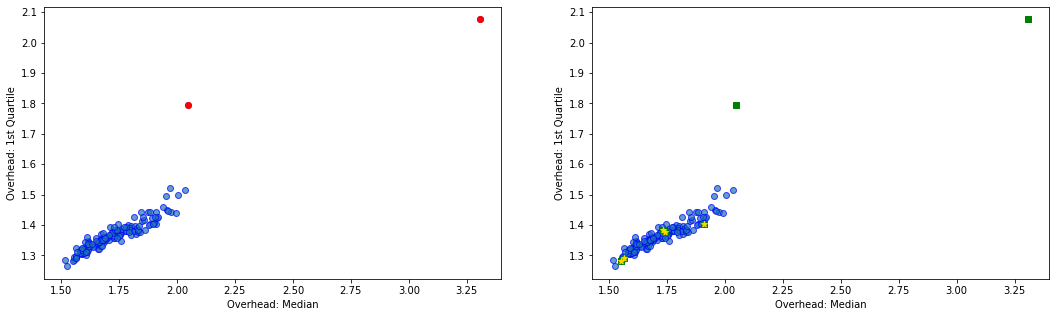

In [95]:
data_split_z_original = data[['median', 'q1', 'q3', 'p90', 'cars']].to_numpy()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,5))

ax1.scatter(data_split_z_original[:,0], data_split_z_original[:,1], cmap='rainbow', alpha=0.7, edgecolors='b')
ax1.scatter(data_split_z_original[ided_o,0], data_split_z_original[ided_o,1], c='red', alpha=1, edgecolors='r')
# ax1
# ax1.grid()
ax1.set_ylabel('Overhead: 1st Quartile')
ax1.set_xlabel('Overhead: Median')

ax2.scatter(data_split_irq[:,0], data_split_irq[:,1], cmap='rainbow', alpha=0.7, edgecolors='b')
ax2.scatter(data_split_z_original[o,0], data_split_z_original[o,1], c='g', alpha=1, edgecolors='g', marker = "s")
ax2.scatter(data_split_z_original[additional,0], data_split_z_original[additional,1], c='gold', alpha=1, edgecolors='gold', marker = '*')
# ax2.grid()
ax2.set_ylabel('Overhead: 1st Quartile')
ax2.set_xlabel('Overhead: Median')

# Run models on each of those

In [50]:
def print_graphs_for_models(data_split_z, title, labels):
    figure, axs = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
    axs[0,0].scatter(data_split_z[:,4], data_split_z[:,0],c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
    axs[0,0].set_ylabel('Overhead: median')
    axs[0,0].set_xlabel('Car number')

    axs[0,1].scatter(data_split_z[:,4], data_split_z[:,1],c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
    axs[0,1].set_ylabel('Overhead: Q1')
    axs[0,1].set_xlabel('Car number')

    axs[1,0].scatter(data_split_z[:,4], data_split_z[:,2],c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')    
    axs[1,0].set_ylabel('Overhead: Q3')
    axs[1,0].set_xlabel('Car number')

    axs[1,1].scatter(data_split_z[:,4], data_split_z[:,3],c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')
    axs[1,1].set_ylabel('Overhead: 90th Percentile')
    axs[1,1].set_xlabel('Car number')

    figure.tight_layout(rect=[0, 0.03, 1, 0.95])
    figure.suptitle(title, fontsize=36)

In [43]:
def plot_silhouette_scores(model, test_data, n_clusters_min, n_clusters_max):
    """ Plot silhouette scores and return the best number of clusters"""

    if len(model.subcluster_labels_) > 2:

        silhouette_scores = []

        clusters_range = range(n_clusters_min, n_clusters_max+1)
        results_dict = []
        # print(clusters_range)
        for number in clusters_range:
            # make a copy of the model so as not to mess up the 'correct' model
            model_cpy = model
            model_cpy.set_params(n_clusters=number)

            model_cpy.partial_fit()
            labels = model_cpy.predict(test_data)
            # print(labels)
            try: 
                s = metrics.silhouette_score(test_data, labels, metric='euclidean')
                silhouette_scores.append(s)
                results_dict.append((number, s))
            except ValueError:
                pass

        silhouette_range = [i[0] for i in results_dict]  
        plt.plot(silhouette_range[:], silhouette_scores[:])
        plt.xlabel('Number Of Clusers')
        plt.ylabel('Silhouette Score')
#         plt.savefig(folder + 'silhouette_'+ save_graph_name +'.png')
        plt.show()
        plt.close() 
        max_score = max(silhouette_scores)
        for i in results_dict:
            if i[1] == max_score:
                print("The highest silhouette scores(" + str(max_score) + ") is for " + str(i[0]) + " clusers")
                return int(i[0])
    else:
        print('couldnt get the scores, plz help')
        print('returning number of clusters = ' + str(n_clusters_min))
        return n_clusters_min

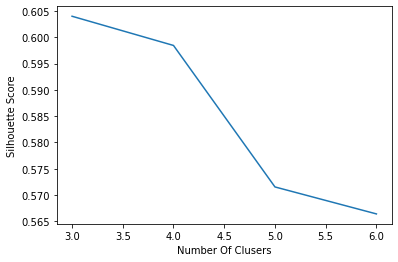

The highest silhouette scores(0.6040102459692982) is for 3 clusers


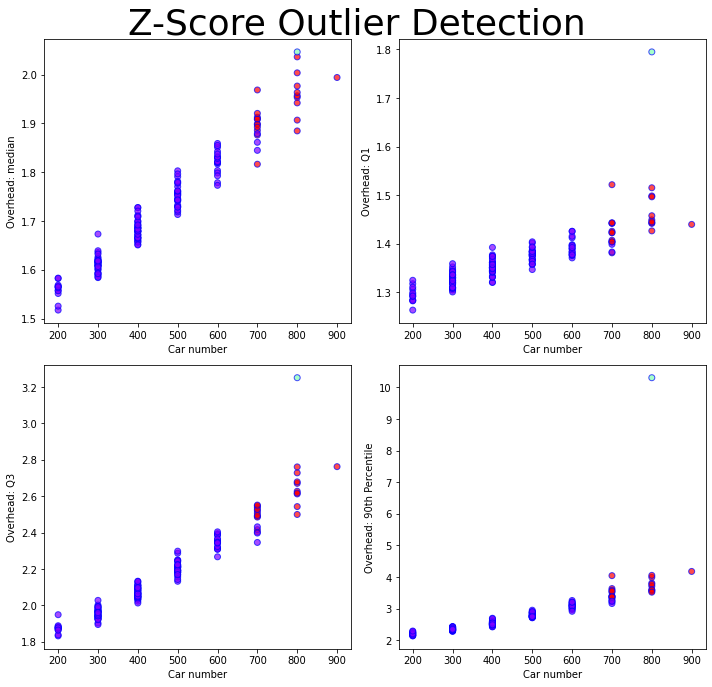

In [25]:
model_z = Birch(n_clusters=None, threshold=0.1)

# for i in test_normal_list:
#     model.partial_fit(i)

model_z.partial_fit(data_split_z[:, 0:-1])

n = plot_silhouette_scores(model_z, data_split_z[:, 0:-1], 3, 6)

model_z.set_params(n_clusters = n)
model_z.partial_fit()
    
labels_z = model_z.predict(data_split_z[:, 0:-1])
print_graphs_for_models(data_split_z, 'Z-Score Outlier Detection', labels_z)

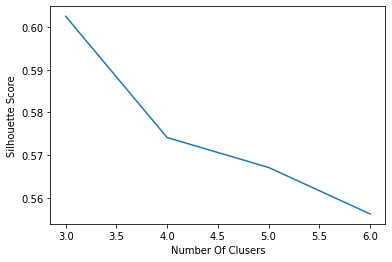

The highest silhouette scores(0.6025260039112511) is for 3 clusers


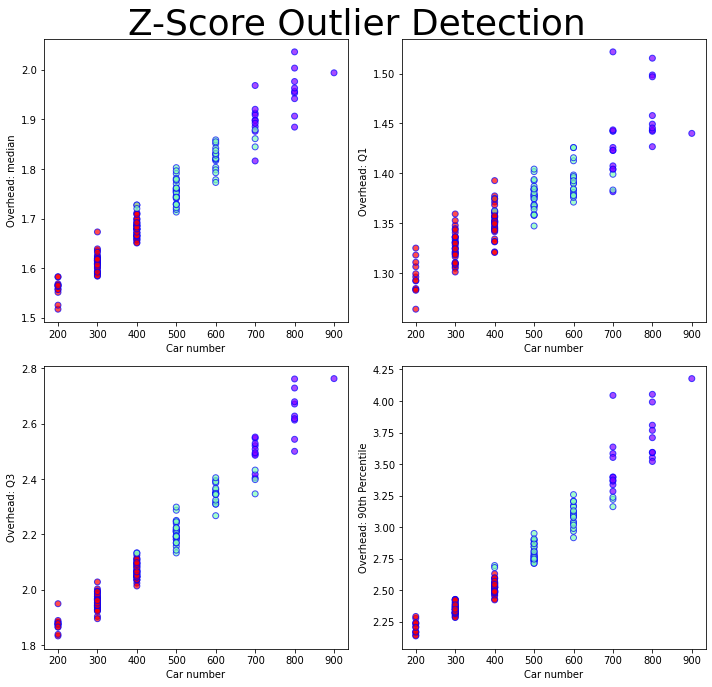

In [51]:
model_modified_z = Birch(n_clusters=None, threshold=0.1)

# for i in test_normal_list:
#     model.partial_fit(i)

model_modified_z.partial_fit(data_split_modified_z[:, 0:-1])

n = plot_silhouette_scores(model_modified_z, data_split_modified_z[:, 0:-1], 3, 6)

model_modified_z.set_params(n_clusters = n)
model_modified_z.partial_fit()
    
labels_modified_z = model_modified_z.predict(data_split_modified_z[:, 0:-1])
print_graphs_for_models(data_split_modified_z, 'Z-Score Outlier Detection', labels_modified_z)

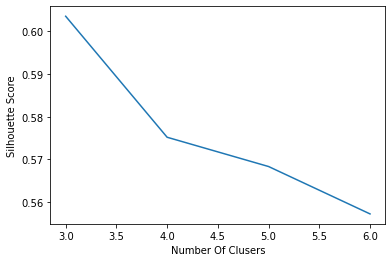

The highest silhouette scores(0.6035305852834669) is for 3 clusers


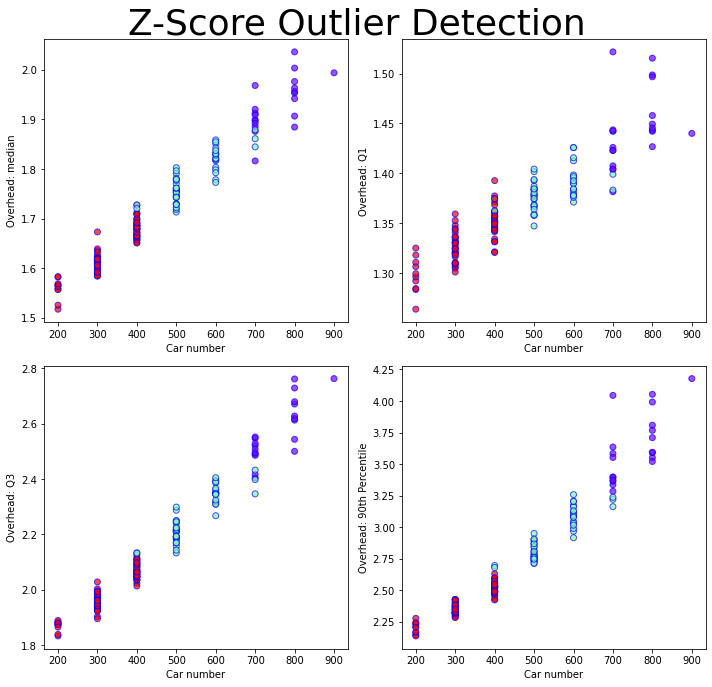

In [27]:
model_irq = Birch(n_clusters=None, threshold=0.1)

# for i in test_normal_list:
#     model.partial_fit(i)

model_irq.partial_fit(data_split_irq[:, 0:-1])

n = plot_silhouette_scores(model_irq, data_split_irq[:, 0:-1], 3, 6)

model_irq.set_params(n_clusters = n)
model_irq.partial_fit()
    
labels_irq = model_irq.predict(data_split_irq[:, 0:-1])
print_graphs_for_models(data_split_irq, 'Z-Score Outlier Detection', labels_irq)